In [167]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [168]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [169]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'tech', 'stable', 'max_full',
       'total', 'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+',
       '6c', '6c+', '7a', '7a+', '4F2G', '3F2G', '16', '12', '15°', '35°',
       'sloper', 'pinch', '2F2G'],
      dtype='object')

In [170]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # technique
    'tech': boulder_6a_plus / 3,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    'pinch'
]

gymnastics = ['block', 'core', 'anta', 'legs', 'L-Sit',]
climbing = ['4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',]


def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        
    
def calc_gym_scores(row):
    s = [row[key] * scores_translator[key] for key in gymnastics]
    return sum(s)

def calc_climbing_scores(row):
    s = [row[key] * scores_translator[key] for key in climbing]
    return sum(s)

def calc_arc_scores(row):
    s = [row[key] * scores_translator[key] for key in ['arc']]
    return sum(s)

def calc_technique_scores(row):
    s = [row[key] * scores_translator[key] for key in ['tech']]
    return sum(s)

In [171]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
gym_scores = sessions.apply(calc_gym_scores, axis=1)
climbing_scores = sessions.apply(calc_climbing_scores, axis=1)
arc_scores = sessions.apply(calc_arc_scores, axis=1)
tech_scores = sessions.apply(calc_technique_scores, axis=1)


sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions['gym_scores'] = gym_scores
sessions['climbing_scores'] = climbing_scores
sessions['arc_scores'] = arc_scores
sessions['tech_scores'] = tech_scores

In [172]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

# Doripa: Five last entries

In [173]:
doripa.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
39,424.0,0.0,0.0,0.0,0.0
41,581.0,0.0,0.0,0.0,0.0
42,346.0,0.0,486.0,579.0,400.0
45,491.0,0.0,534.0,750.0,0.0
47,359.0,308.0,418.4,0.0,0.0


# Doripa: Maximal sessions

In [174]:
doripa[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    1357.0
tech_scores         308.0
gym_scores          534.0
hang_scores         750.0
arc_scores          400.0
dtype: float64

# Sunshine: Last five scores

In [175]:
sunshine_sessions.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
38,348.0,0.0,0.0,0.0,0.0
40,451.0,0.0,0.0,336.0,0.0
43,0.0,0.0,0.0,396.0,0.0
44,279.0,0.0,412.0,453.0,0.0
46,230.0,259.0,0.0,0.0,0.0


# Sunshine: Maximal Sessions

In [176]:
sunshine_sessions[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    556.0
tech_scores        259.0
gym_scores         412.0
hang_scores        453.0
arc_scores           0.0
dtype: float64

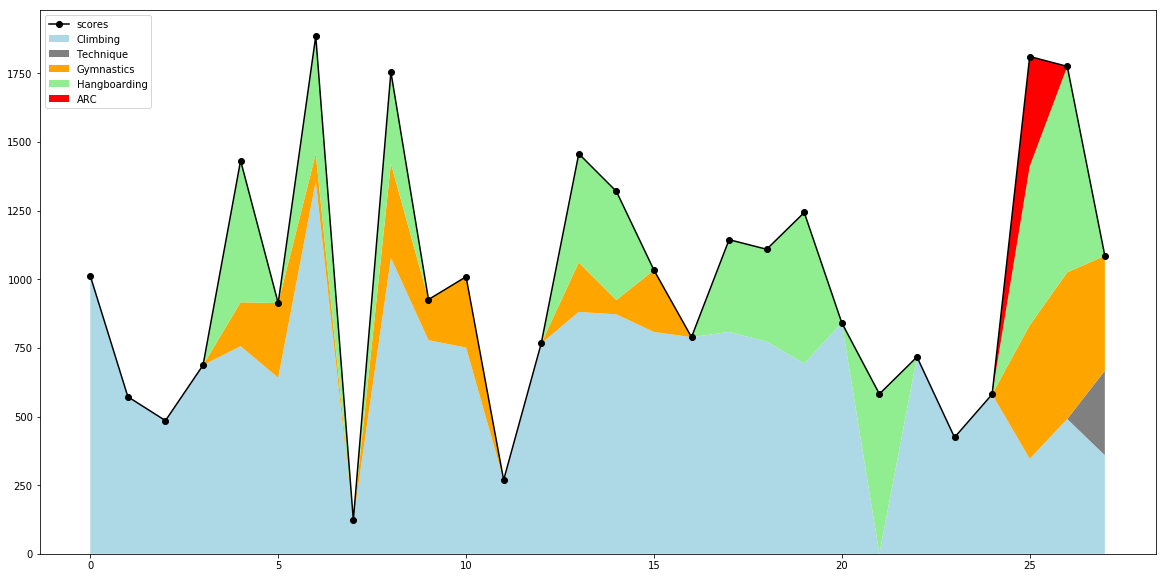

In [177]:

plt.figure(figsize=(20,10))

x = np.arange(len(doripa))
scores = [
    doripa.climbing_scores,
    doripa.tech_scores,
    doripa.gym_scores,

    doripa.hang_scores,
    doripa.arc_scores,
]
labels = ['Climbing', 'Technique', 'Gymnastics', 'Hangboarding',  'ARC', ]
colors = ['lightblue', 'gray', 'orange', 'lightgreen', 'red', ]

y = np.vstack(scores)
plt.stackplot(x, y, labels=labels, colors=colors)
plt.plot(x, doripa.scores, marker='o', color='black')
plt.legend(loc=2)
plt.show()


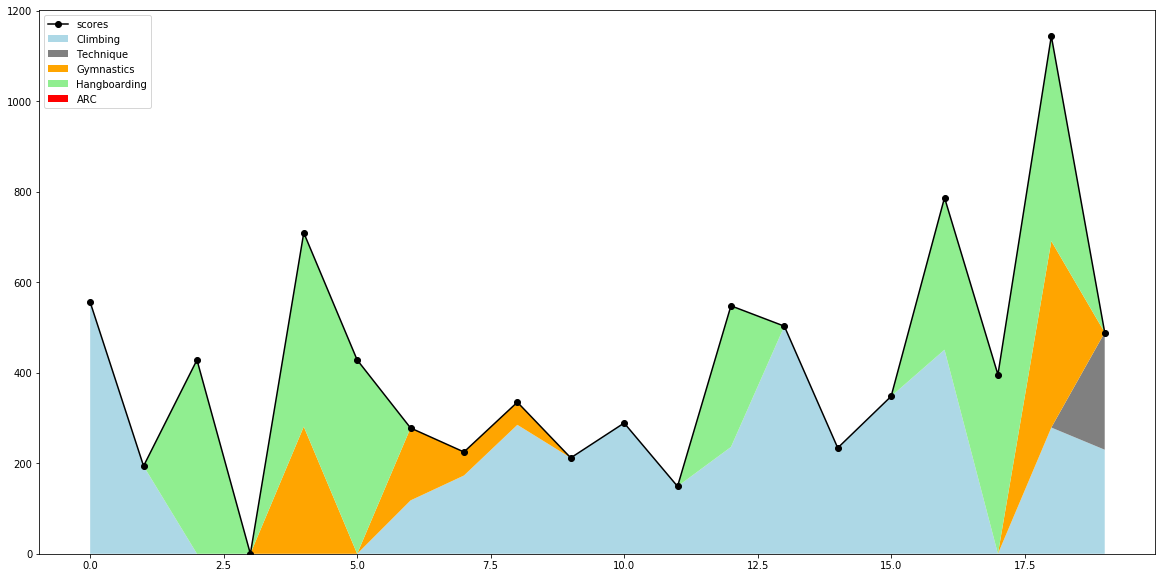

In [178]:
plt.figure(figsize=(20,10))

x = np.arange(len(sunshine_sessions))
scores = [
    sunshine_sessions.climbing_scores,
    sunshine_sessions.tech_scores,
    sunshine_sessions.gym_scores,

    sunshine_sessions.hang_scores,
    sunshine_sessions.arc_scores,
]
labels = ['Climbing', 'Technique', 'Gymnastics', 'Hangboarding',  'ARC', ]
colors = ['lightblue', 'gray', 'orange', 'lightgreen', 'red', ]

y = np.vstack(scores)
plt.stackplot(x, y, labels=labels, colors=colors)
plt.plot(x, sunshine_sessions.scores, marker='o', color='black')
plt.legend(loc=2)
plt.show()


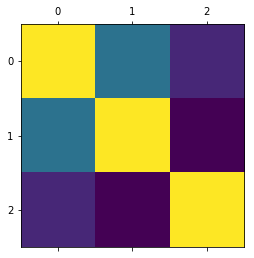

In [179]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [180]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.656211,0.510343
total6,0.656211,1.000000,0.449707
scores,0.510343,0.449707,1.000000


In [181]:
doripa['total'].corr(doripa['total6'])

0.6562107930798667

In [182]:
doripa['total'].corr(doripa['scores'])

0.5103431753378782

In [183]:
doripa['scores'].corr(doripa['total6'])

0.44970725421618796

In [184]:
sunshine_sessions.corr()['scores']

cycle              0.069577
kg                -0.050107
hang               0.577896
core               0.605484
block              0.717149
arc                     NaN
anta               0.314180
legs              -0.071114
L-Sit              0.249477
tech               0.069906
total              0.332810
total6             0.271666
4                  0.085713
5a                 0.118767
5b                 0.535279
5c                 0.137064
6a                 0.189304
6a+                0.241475
6b                 0.157762
6b+                0.199747
6c                 0.077320
6c+                     NaN
7a                -0.200230
7a+                     NaN
4F2G               0.418034
3F2G               0.551169
16                 0.456361
12                      NaN
15°                0.558965
35°                0.654155
sloper             0.123933
pinch                   NaN
2F2G                    NaN
scores             1.000000
hang_scores        0.658957
gym_scores         0

In [185]:
doripa.corr()['scores']

cycle              0.128764
kg                -0.044848
hang               0.697860
core               0.611626
block              0.423645
arc                0.342166
anta               0.534107
legs               0.017643
L-Sit              0.312278
tech               0.039422
total              0.510343
total6             0.449707
4                  0.188497
5a                 0.085173
5b                 0.251112
5c                 0.237915
6a                 0.344226
6a+                0.266747
6b                 0.316439
6b+                0.321435
6c                 0.131761
6c+                0.238616
7a                 0.250043
7a+               -0.076421
4F2G               0.736372
3F2G               0.725698
16                 0.450022
12                 0.361670
15°                0.318113
35°                0.488392
sloper                  NaN
pinch              0.418281
2F2G               0.184035
scores             1.000000
hang_scores        0.707969
gym_scores         0